In [3]:
# First of all install all needed libraries we will use in this project
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import warnings
plt.style.use('fivethirtyeight')


warnings.filterwarnings('ignore')
%matplotlib inline


params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)
sns.set_context('notebook')
sns.set_style('white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
# Create a path to the directory of the project 
# Get train.csv into the variable data

path_to_train_data = "train.csv"
data = pd.read_csv(path_to_train_data)

In [5]:
def create_title(data):
    data['Title'] = data['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()
    # Fill missing values
    data['Title'].fillna(0, inplace=True)

def replace_old_titles(data):
    old = ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'the Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona']
    new = ['Miss', 'Mrs', 'Miss', 'Mr', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
           'Other', 'Other']
    data['Title'].replace(old, new, inplace=True)

def new_Ticket(data):
    data['Ticket'] = data['Ticket'].str[0]
    
def CombineTicket(data):
    data['Ticket'] = data['Ticket'].replace(['A', 'W', 'F', 'L', '5', '6', '7', '8', '9'], 4)

def Ticket_to_numeric(data):
    data['Ticket'] = data['Ticket'].replace('S', 5)
    data['Ticket'] = data['Ticket'].replace('P', 6)
    data['Ticket'] = data['Ticket'].replace('C', 7)
    data['Ticket'] = data['Ticket'].astype(int)

def fill_missing_Age(data):
    # We use this as indicator to which Title what the average Age is
    data.groupby('Title')['Age'].mean()
    # Fill missing data for Age column
    # With the statistics we make approximate estimation about the missing value
    # This way we dont delete records(rows) with missing Age but save the record by fixing the data

    # if Age has no value and depending on title we fill the Age column with the mean value for the group
    data.loc[(data.Age.isnull()) & (data.Title == 'Master'), 'Age'] = 4
    data.loc[(data.Age.isnull()) & (data.Title == 'Miss'), 'Age'] = 22
    data.loc[(data.Age.isnull()) & (data.Title == 'Mr'), 'Age'] = 33
    data.loc[(data.Age.isnull()) & (data.Title == 'Mrs'), 'Age'] = 36
    data.loc[(data.Age.isnull()) & (data.Title == 'Other'), 'Age'] = 45

    # check if there are any missing values
    data['Age'].isnull().values.any()

def fill_missing_Embarked(data):
    # Fill Embarked column with S, because most of the Passengers are from port S
    data['Embarked'].fillna('S', inplace=True)


def create_Family_Size_and_Alone(data):
    # Create a new column for family size, a combination of Sibsp and Parch
    data['Family_Size'] = 0
    data['Family_Size'] = data['Parch'] + data['SibSp'] + 1

    # Create new column Alone, all values set to 0
    # If family size is 0 then the person is alone
    data['Alone'] = 0
    data.loc[data['Family_Size'] == 0, 'Alone'] = 1

def Preprocess_Family_Size(data):
    data['Family_Size'] = data['Family_Size'].map(lambda x: 0 if x > 4 else x)


def create_Age_band(data):
    # Populate Age_band with according age groups

    Age_Band_Values = [5, 15, 26, 38]

    data['Age_band'] = 0

    data.loc[data['Age'] <= Age_Band_Values[0], 'Age_band'] = 0
    data.loc[(data['Age'] > Age_Band_Values[0]) & (data['Age'] <= Age_Band_Values[1]), 'Age_band'] = 1
    data.loc[(data['Age'] > Age_Band_Values[1]) & (data['Age'] <= Age_Band_Values[2]), 'Age_band'] = 2
    data.loc[(data['Age'] > Age_Band_Values[2]) & (data['Age'] <= Age_Band_Values[3]), 'Age_band'] = 3
    data.loc[(data['Age'] > Age_Band_Values[3]), 'Age_band'] = 4


def create_Fare_category(data):
    # Create 4 ranges
    data['Fare_Range'] = pd.qcut(data['Fare'], 4)

    # Create new feature telling in which category the fare is
    data['Fare_cat'] = 0
    data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
    data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

def map_sex(data):
    sex_mapping = {'male': 0, 'female': 1}
    data['Sex'] = data['Sex'].map(sex_mapping)

def map_embarked(data):
    embarked_mapping = {"S": 0, "C": 1, "Q": 2}
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

def map_title(data):
    title_mapping = {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4}
    data['Title'] = data['Title'].map(title_mapping)

def create_Surname(data):
    data['Surname'] = data['Name'].str.split(',').str.get(0)

def drop_features(data):
    data.drop(['Name', 'Age', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId', "SibSp", 'Parch'], axis=1, inplace=True)
    return data

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data

def create_dummy_columns(data):
    dummy_columns = ['Pclass', 'Embarked', 'Title', 'Age_band', 'Fare_cat']

    data[['Pclass', 'Embarked', 'Title', 'Age_band', 'Fare_cat', 'Ticket']] = data[
        ['Pclass', 'Embarked', 'Title', 'Age_band', 'Fare_cat', 'Ticket']].apply(pd.to_numeric)
    res = dummy_data(data, dummy_columns)
    return res


def Preprocessing(data):
    create_title(data)
    replace_old_titles(data)
    fill_missing_Age(data)
    fill_missing_Embarked(data)
    create_Family_Size_and_Alone(data)
    Preprocess_Family_Size(data)

    create_Age_band(data)
    create_Fare_category(data)

    new_Ticket(data)
    CombineTicket(data)
    Ticket_to_numeric(data)

    map_sex(data)
    map_embarked(data)
    map_title(data)
    drop_features(data)
    final_db = create_dummy_columns(data)

    return final_db


def Plot(res, feature, label):
    objects = res[feature].values
    #print(data['Embarked'].value_counts())

    y_pos = np.arange(len(objects))
    values = res[label].values
    plt.figure(figsize=(6, 2))
    plt.bar(y_pos, values, align='center', alpha=0.5, color='blue')
    plt.xticks(y_pos, objects)
    title_text = feature + ' vs ' + label
    plt.title(title_text)

    plt.show()

In [6]:
Preprocessing()

TypeError: Preprocessing() missing 1 required positional argument: 'data'

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# check if there is any NAN
data['Pclass'].isnull().sum(axis=0)

0

In [11]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


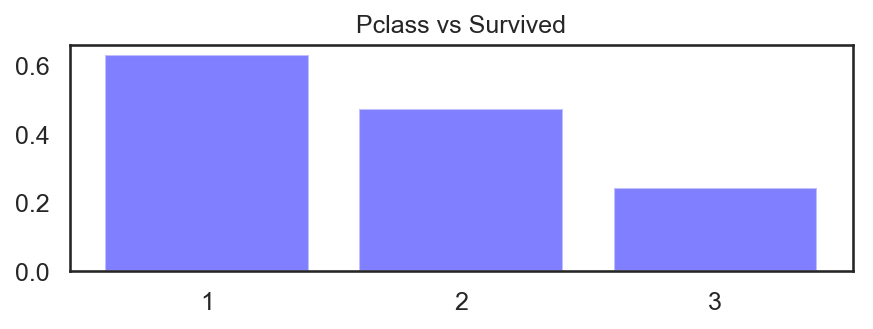

In [12]:
# inspect the correlation between Pclass and Survived
print(data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
res = data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
# PClass should be an important feature

Plot(res, 'Pclass', 'Survived')

In [13]:
data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [14]:
# Each Name has a title which contains information of gender and status
def create_title(data):
    data['Title'] = data['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()
    # Fill missing values
    data['Title'].fillna(0, inplace=True)

create_title(data)

# Inspect the amount of people for each title
print(data['Title'].value_counts())

# Observation: The main categories are Mr, Miss, Mrs and Master. We can merge some of the others to these main 
# categories. 

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Lady              1
Mme               1
Don               1
Capt              1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.160305
3     Mrs  0.793651
4   Other  0.312500


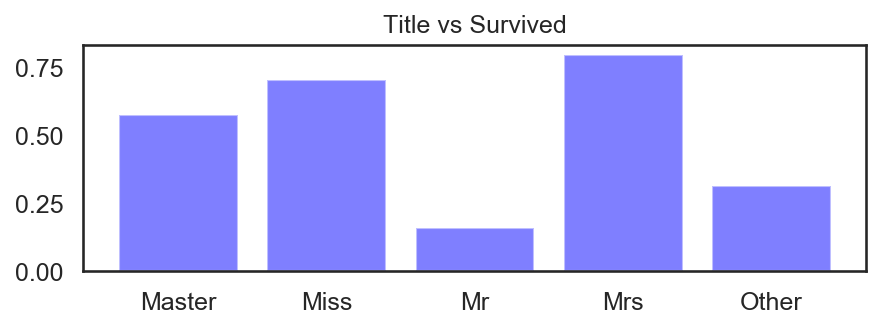

In [15]:
# Lets merge all of the categories
def replace_old_titles(data):
    old = ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'the Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don']
    new = ['Miss', 'Mrs', 'Miss', 'Mr', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
           'Other', 'Other']
    data['Title'].replace(old, new, inplace=True)

replace_old_titles(data)

# Inspect correlation
print(data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
res = data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Plot(res, 'Title', 'Survived')

# mapping will be done later because we need the title to estimate the missing Ages

In [16]:
# check if there is any NAN
data.Sex.isnull().sum(axis=0)

0

      Sex  Survived
0  female  0.742038
1    male  0.188908


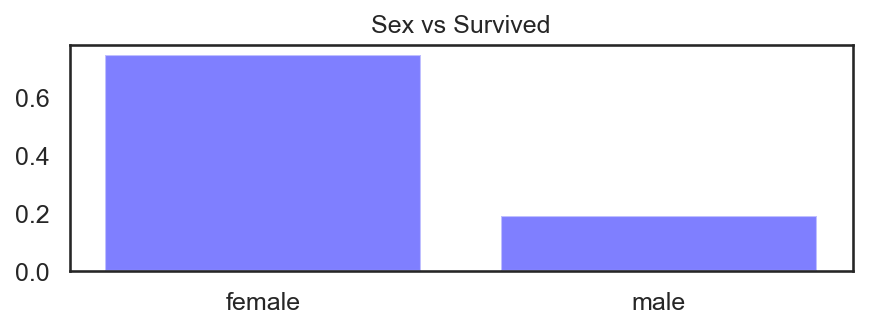

In [17]:
# inspect the correlation between Sex and Survived
res = data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
print(res)

Plot(res, 'Sex', 'Survived')

In [18]:
# map the two genders to 0 and 1
def map_sex(data):
    sex_mapping = {'male': 0, 'female': 1}
    data['Sex'] = data['Sex'].map(sex_mapping)

map_sex(data)

In [19]:
# check if there is any NAN
data.Age.isnull().sum(axis=0)

177

In [20]:
# There are too many missing values in the Age column, we cannot delete them so we have to fill them up
# We are gonna use the Title feature we just created and the mean value for each of its values

def fill_missing_Age(data):
    # We use this as indicator to which Title what the average Age is
    print(data.groupby('Title')['Age'].mean())
    # Fill missing data for Age column
    # With the statistics we make approximate estimation about the missing value
    # This way we dont delete records(rows) with missing Age but save the record by fixing the data

    # if Age has no value and depending on title we fill the Age column with the mean value for the group
    data.loc[(data.Age.isnull()) & (data.Title == 'Master'), 'Age'] = 5
    data.loc[(data.Age.isnull()) & (data.Title == 'Miss'), 'Age'] = 22
    data.loc[(data.Age.isnull()) & (data.Title == 'Mr'), 'Age'] = 33
    data.loc[(data.Age.isnull()) & (data.Title == 'Mrs'), 'Age'] = 36
    data.loc[(data.Age.isnull()) & (data.Title == 'Other'), 'Age'] = 45

    # check if there are any missing values
    data['Age'].isnull().values.any()
    
fill_missing_Age(data)


Title
Master     4.574167
Miss      21.845638
Mr        32.511139
Mrs       35.788991
Other     46.875000
Name: Age, dtype: float64


In [21]:
# check if there is any NAN
data.SibSp.isnull().sum(axis=0), data.Parch.isnull().sum(axis=0)


(0, 0)

   Family_Size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


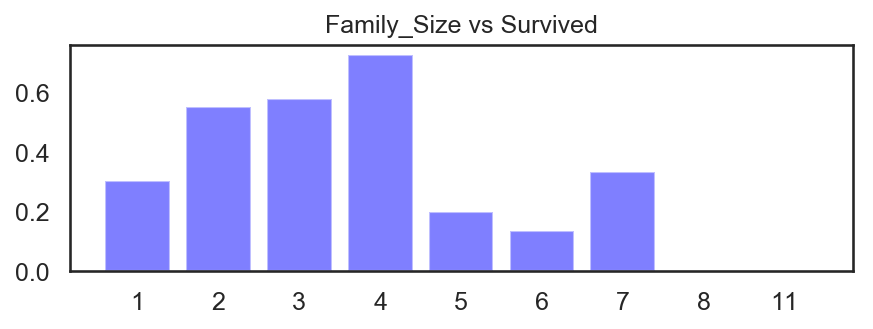

In [22]:
# create new features - Family_Size and Alone
def create_Family_Size_and_Alone(data):
    # Create a new column for family size, a combination of Sibsp and Parch
    data['Family_Size'] = 0
    data['Family_Size'] = data['Parch'] + data['SibSp'] + 1

    # Create new column Alone, all values set to 0
    # If family size is 0 then the person is alone
    data['Alone'] = 0
    data.loc[data['Family_Size'] == 1, 'Alone'] = 1


create_Family_Size_and_Alone(data)
#print(data['Alone'].value_counts())
res = data[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean()
print(res)

Plot(res, 'Family_Size', 'Survived')

   Family_Size  Survived
0            0  0.161290
1            1  0.303538
2            2  0.552795
3            3  0.578431
4            4  0.724138


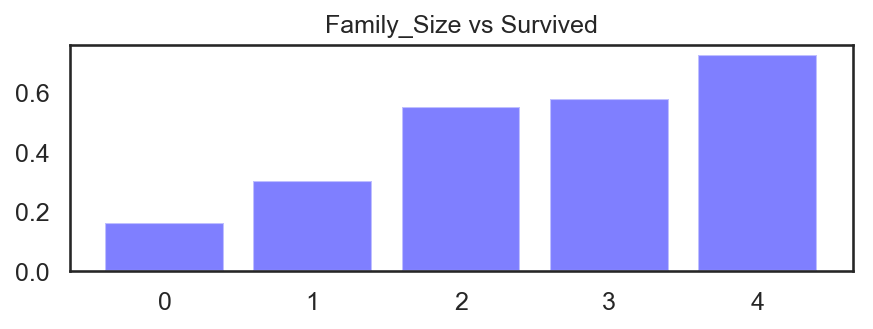

In [23]:
def Preprocess_Family_Size(data):
    data['Family_Size'] = data['Family_Size'].map(lambda x: 0 if x > 4 else x)

Preprocess_Family_Size(data)
res = data[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean()
print(res)
Plot(res, 'Family_Size', 'Survived')

In [24]:
# check if there is any NAN
data.Ticket.isnull().sum(axis=0)

0

In [25]:
data.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

   Ticket  Survived
0       1  0.630137
1       2  0.464481
2       3  0.239203
3       4  0.200000
4       5  0.000000
5       6  0.166667
6       7  0.111111
7       8  0.000000
8       9  1.000000
9       A  0.068966
10      C  0.340426
11      F  0.571429
12      L  0.250000
13      P  0.646154
14      S  0.323077
15      W  0.153846


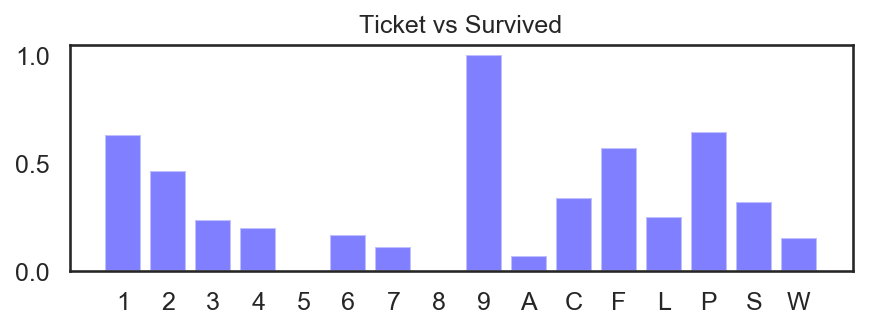

In [26]:
# It looks like there are two types of tickets: 
# (1) number 
# (2) letters + number

# Ticket names with letters probably represent some special classes. For the numbers, the majority of tickets have 
# their first digit = 1, 2, or 3, which probably also represent different classes. 

# Lets keep only the first letter/number of the ticket

def new_Ticket(data):
    data['Ticket'] = data['Ticket'].str[0]
    
new_Ticket(data)

res = data[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()
print(res)

Plot(res, 'Ticket', 'Survived')



In [27]:
# inspect the amount of people for each type of tickets
data['Ticket'].value_counts()

# The majority of tickets is indeed "3", "2", and "1" For all others the survival rate is low except for "9","C","F",
# "P", and "S". However, "9" and "F" are very small sample. 

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

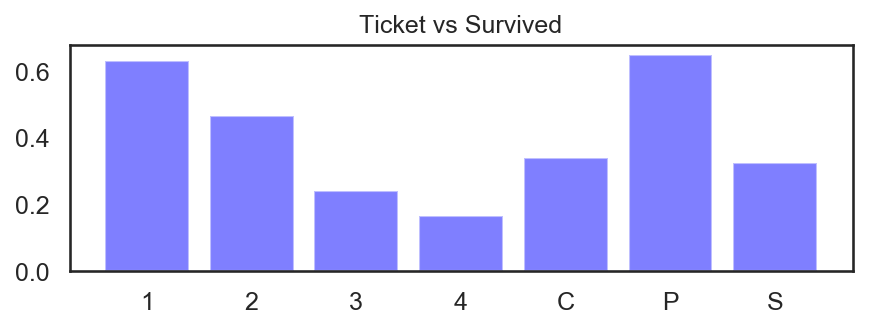

In [28]:
# The main categories of Ticket are "1", "2", "3", "P", "S", and "C", so I will combine all the others into "4"
def CombineTicket(data):
    data['Ticket'] = data['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

CombineTicket(data)

# check the correlation again
res = data[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

Plot(res, 'Ticket', 'Survived')
# turn chars to numerics
Ticket_to_numeric(data)

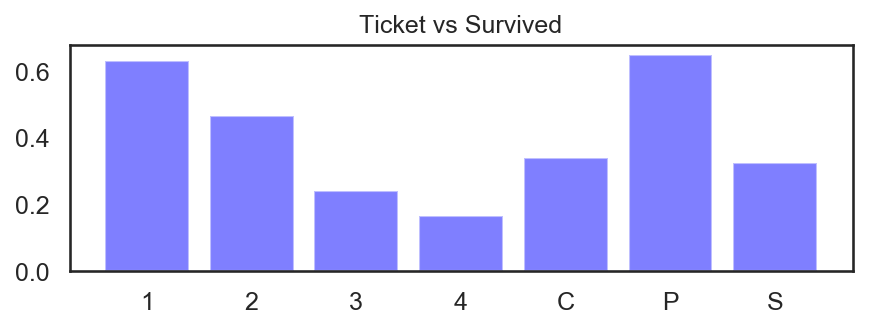

In [29]:
Plot(res, 'Ticket', 'Survived')

S    646
C    168
Q     77
Name: Embarked, dtype: int64


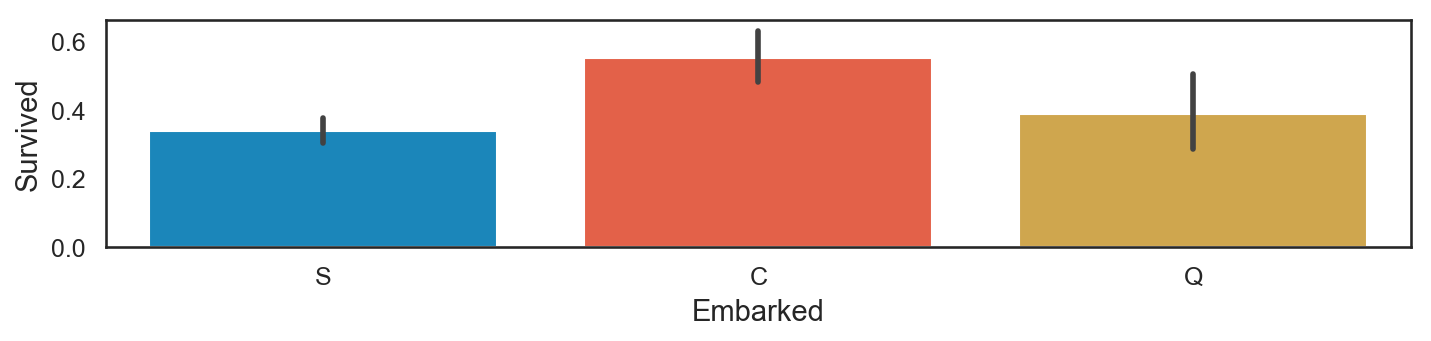

In [30]:
# 0 - S (Southampton)
# 1 - C (Cherbourg)
# 2 - Q (Queenstown)

# Most of the passengers are from port S that is why we fill the missing values from Embarked with S
fill_missing_Embarked(data)

# Plot of Embarked vs Survived
fig, ax = plt.subplots(figsize=(10,2))
sns.barplot(x='Embarked', y='Survived', data=data,ax=ax, orient='v' )



print(data['Embarked'].value_counts())

# Map letters to numbers
map_embarked(data)

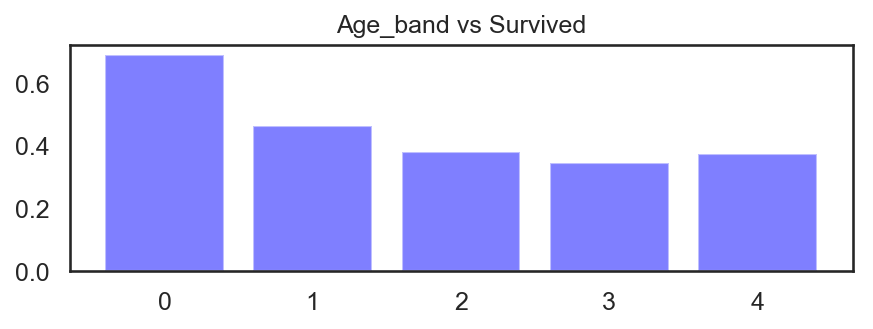

In [31]:
# Create Age band and plot
create_Age_band(data)

res = data[['Age_band', 'Survived']].groupby(['Age_band'], as_index=False).mean()
Plot(res, 'Age_band', 'Survived')

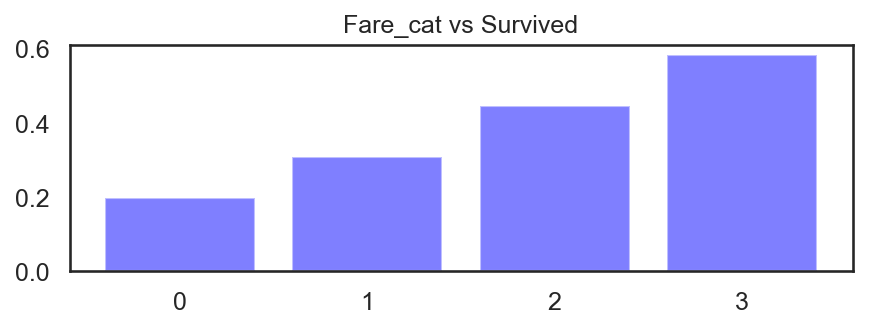

In [32]:
# Create Age band and plot

# 0 indicates low fare
# 3 indicates high fare
create_Fare_category(data)

res = data[['Fare_cat', 'Survived']].groupby(['Fare_cat'], as_index=False).mean()
Plot(res, 'Fare_cat', 'Survived')

In [33]:
# Map title to numeric representation
map_title(data)

# drop features and create dummy columns
drop_features(data)

data = create_dummy_columns(data)

In [34]:
data.columns

Index(['Survived', 'Sex', 'Ticket', 'Family_Size', 'Alone', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Age_band_0',
       'Age_band_1', 'Age_band_2', 'Age_band_3', 'Age_band_4', 'Fare_cat_0',
       'Fare_cat_1', 'Fare_cat_2', 'Fare_cat_3'],
      dtype='object')

# One liner for Preprocessing

In [35]:
data = Preprocessing(data)

KeyError: 'Name'

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble.forest import RandomForestClassifier, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
features = list(data.columns.values)
features.remove('Survived')
X = data[features].values
Y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

lr_model = LinearSVC(random_state=42)
lr_model.fit(X_train, y_train)

lr_model_results = lr_model.predict(X_test)
print("accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_model_results)))

accuracy : 0.8321


In [37]:
from sklearn.ensemble.forest import RandomForestClassifier, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=0, oob_score=True)

parameters = {'criterion' :['gini'],
             'n_estimators' : [32], #400
             'max_depth':[5], #5
             'min_samples_leaf': [4], #4
              'max_leaf_nodes': [10], #10]
              'min_impurity_decrease': [0], #0
              'max_features' : [1] #1
             }
scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv = 10)

grid_fit = grid_obj.fit(X_train,y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Oob score on testing data: {:.4f}".format(clf.oob_score_))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final oob score on the testing data: {:.4f}".format(best_clf.oob_score_))
print("\nBest Parameters\n------")
rfc_predict2 = best_clf.predict(X_test)
print("accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, rfc_predict2)))

Unoptimized model
------
Accuracy score on testing data: 0.8022
Oob score on testing data: 0.8122

Optimized Model
------
Final accuracy score on the testing data: 0.7799
Final oob score on the testing data: 0.7994

Best Parameters
------
accuracy : 0.7799


C:\Program Files\Python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
path_to_test_data = "test.csv"
test = pd.read_csv(path_to_test_data)

In [39]:
passid = test['PassengerId'].values
test = Preprocessing(test)

Title
Dona      39.000000
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64


In [40]:
lr_test_results = lr_model.predict(test.values)

In [41]:
passengerIds = passid
result_values = lr_test_results
result_table = pd.DataFrame({
    'PassengerId': passengerIds,
    'Survived': result_values
})

In [94]:
path_to_save_results = "result_02.csv"
result_table.to_csv(path_to_save_results, index=False)